<h1>NBA players from 2013-2014 basketball season using KMeans to group players into clusters and show which players are most similar</h1>


In [0]:
#Import Modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#Load the data
from google.colab import files
uploaded = files.upload()
nba = pd.read_csv('nba_2013.csv')

Saving nba_2013.csv to nba_2013.csv


In [4]:
#Shape of dataset
nba.shape

(481, 31)

In [6]:
#Description for each numeric column
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,481.000000,481.000000,478.000000,479.000000,481.000000,481.000000,461.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,153.268191,314.332640,0.466947,0.480752,91.205821,120.642412,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,147.223161,294.174554,0.104448,0.099552,103.667725,131.240639,0.160166,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,31.000000,67.000000,0.434719,0.451000,16.000000,22.000000,0.654000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,110.000000,227.000000,0.474475,0.488000,53.000000,73.000000,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,230.000000,459.000000,0.513729,0.526000,126.000000,179.000000,0.821000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,706.000000,1408.000000,1.000000,1.000000,703.000000,805.000000,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [7]:
#Average of field goal column

nba.loc[:,['fg']].mean()

fg    192.881497
dtype: float64

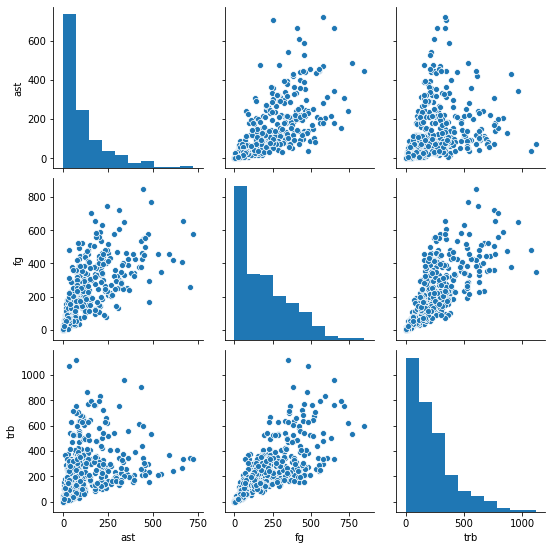

In [11]:
#Pair-wise scatterplot
#View how different columns correlate

sns.pairplot(nba[['ast','fg','trb']])
plt.show()

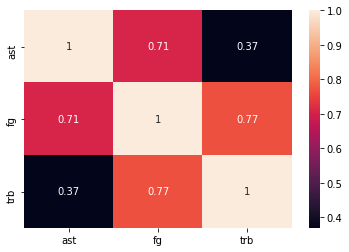

In [17]:
#Heat map

correlation = nba[['ast','fg','trb']].corr()

sns.heatmap(correlation, annot=True)
plt.show()

<h1>Cluster of players using KMeans</h1>

In [23]:
#5 clusters
kmeans_model = KMeans(n_clusters=5,random_state=1)

#Get non-missing data and remove columns with missing data
good_columns = nba._get_numeric_data().dropna(axis=1)

#Train model
kmeans_model.fit(good_columns)

#Cluster label for each layer
labels = kmeans_model.labels_

#0-4, 5 different clusters
print(labels)

[0 0 0 1 0 3 1 0 2 2 4 3 2 2 4 0 2 1 3 0 4 3 0 0 4 3 0 3 3 3 2 2 4 2 3 4 2
 1 2 3 0 1 0 4 0 2 3 3 0 2 2 2 2 3 3 2 0 2 4 1 4 2 4 3 2 3 3 3 3 0 3 4 4 2
 4 3 3 0 0 0 4 2 3 4 4 1 2 4 2 4 3 3 0 3 3 2 3 4 2 1 3 1 3 3 4 4 0 2 3 3 1
 2 3 3 3 1 0 2 3 3 3 0 4 1 4 0 0 0 1 1 2 4 4 1 3 3 1 3 0 0 4 4 0 3 4 3 4 3
 2 2 4 3 3 0 4 0 0 0 4 4 1 0 1 4 2 3 3 3 3 3 4 1 0 3 2 2 4 1 0 1 3 0 3 0 2
 1 2 3 3 0 3 3 3 4 0 4 0 1 4 0 4 4 4 2 4 2 3 4 0 3 3 0 1 0 2 1 2 2 1 3 4 4
 3 3 3 1 3 3 3 1 4 3 1 0 4 0 0 1 3 4 3 3 0 3 4 4 0 0 4 3 2 2 0 1 4 2 3 3 0
 2 3 3 4 3 4 1 3 4 3 0 0 3 1 4 2 0 4 1 1 3 2 0 4 2 0 0 4 3 1 3 3 2 0 0 3 3
 4 4 4 3 4 0 0 0 2 0 2 1 3 3 1 2 3 2 4 2 0 3 2 3 3 3 3 3 3 3 0 3 4 0 1 3 1
 3 0 0 3 4 2 3 3 0 2 3 4 1 2 4 4 0 4 3 2 4 3 3 3 0 3 3 0 2 3 3 3 1 0 3 0 2
 3 2 0 0 0 3 4 4 3 0 2 0 0 2 2 2 0 4 3 3 2 0 0 4 3 3 3 3 3 0 4 0 1 0 3 0 2
 3 1 0 3 2 4 4 0 3 1 3 2 0 3 3 3 1 3 3 2 4 1 4 2 3 0 4 0 3 1 3 0 0 4 2 3 2
 0 3 4 3 4 4 1 1 2 3 0 3 3 4 1 2 3 3 4 2 0 2 2 2 3 0 0 2 3 0 3 0 4 4 1 2 0]


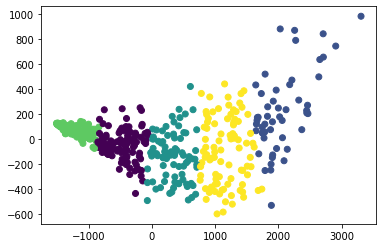

In [28]:
#Plot players by cluster

#2d PCA
pca_2 = PCA(2)

#get x and y coordinates
plot_columns = pca_2.fit_transform(good_columns)
#plot_columns
plt.scatter(x=plot_columns[:,0],y=plot_columns[:,1], c=labels)
plt.show()

In [41]:
lebron = good_columns.loc[nba['player']=='LeBron James',:]
print(lebron)

durant = good_columns.loc[nba['player']=='Kevin Durant',:]
print(durant)

     age   g  gs    mp   fg   fga  ...  stl  blk  tov   pf   pts  season_end
225   29  77  77  2902  767  1353  ...  121   26  270  126  2089        2013

[1 rows x 22 columns]
     age   g  gs    mp   fg   fga  ...  stl  blk  tov   pf   pts  season_end
133   25  81  81  3122  849  1688  ...  103   59  285  174  2593        2013

[1 rows x 22 columns]


<h1>Predict which clusters players belong to </h1>

In [42]:
lebron_list = lebron.values.tolist()

durant_list = durant.values.tolist()

#Output is cluster
print(kmeans_model.predict(lebron_list))
print(kmeans_model.predict(durant_list))

[1]
[1]


In [43]:
nba.corr()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
age,1.000000,-0.012074,0.025163,0.007961,-0.009749,-0.018304,0.025221,0.050611,0.028850,0.014235,-0.028862,-0.035970,0.011306,0.073002,-0.046554,-0.061751,0.021481,-0.068726,0.010822,-0.013451,0.019216,-0.028315,-0.017398,-0.030789,-0.028221,-0.011910,NaN
g,-0.012074,1.000000,0.610951,0.864487,0.739993,0.746963,0.322201,0.518074,0.537011,0.103762,0.684729,0.694243,0.283050,0.351884,0.598333,0.615001,0.252328,0.546902,0.707389,0.682688,0.551128,0.709650,0.475581,0.713508,0.865797,0.728462,NaN
gs,0.025163,0.610951,1.000000,0.860036,0.821619,0.811531,0.234677,0.501808,0.515718,0.063468,0.785619,0.784812,0.205289,0.231222,0.707049,0.720527,0.178607,0.560067,0.774892,0.735738,0.636059,0.743178,0.505589,0.767107,0.725573,0.810294,NaN
mp,0.007961,0.864487,0.860036,1.000000,0.931120,0.936883,0.273682,0.645056,0.666126,0.138230,0.863941,0.874109,0.243727,0.304770,0.805468,0.814450,0.278872,0.576844,0.821145,0.774492,0.733041,0.852331,0.506254,0.885406,0.884484,0.927464,NaN
fg,-0.009749,0.739993,0.821619,0.931120,1.000000,0.988262,0.278007,0.597239,0.613988,0.110514,0.960853,0.962059,0.238487,0.277694,0.893619,0.895138,0.277730,0.562293,0.820259,0.769339,0.708228,0.786597,0.484208,0.903383,0.798769,0.992041,NaN
fga,-0.018304,0.746963,0.811531,0.936883,0.988262,1.000000,0.211174,0.662004,0.685535,0.152111,0.924781,0.944490,0.185373,0.236838,0.887922,0.877945,0.312489,0.487154,0.771821,0.710910,0.748141,0.803290,0.412738,0.910689,0.786560,0.989211,NaN
fg.,0.025221,0.322201,0.234677,0.273682,0.278007,0.211174,1.000000,-0.025510,-0.041720,-0.039424,0.333179,0.283523,0.880201,0.908930,0.217450,0.258550,-0.008697,0.423358,0.377067,0.404832,0.068105,0.185385,0.401431,0.221846,0.359125,0.248276,NaN
x3p,0.050611,0.518074,0.501808,0.645056,0.597239,0.662004,-0.025510,1.000000,0.991700,0.462709,0.351640,0.382531,0.041768,0.219614,0.503353,0.441246,0.369515,-0.065822,0.280171,0.182848,0.617553,0.592092,-0.043707,0.560520,0.446711,0.655342,NaN
x3pa,0.028850,0.537011,0.515718,0.666126,0.613988,0.685535,-0.041720,0.991700,1.000000,0.449886,0.374057,0.408290,0.042401,0.196420,0.527835,0.467615,0.370768,-0.058075,0.291838,0.193712,0.643211,0.622973,-0.040987,0.589799,0.463455,0.672076,NaN
x3p.,0.014235,0.103762,0.063468,0.138230,0.110514,0.152111,-0.039424,0.462709,0.449886,1.000000,-0.032484,-0.013775,-0.118689,0.296875,0.059541,0.017214,0.289435,-0.314490,-0.094895,-0.166848,0.212819,0.150476,-0.187411,0.097876,-0.019089,0.144431,NaN


In [0]:
#Split the data into training and testing sets
X = nba[['fg']]
y = nba[['ast']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

<h1>Predict number of assists from the field goals made using linear regression</h1>


In [52]:
#Linear Regression model

lr = LinearRegression()

#Training the model
lr.fit(X_train,y_train)

predictions = lr.predict(X_test)

print(predictions)
print(y_test) #Actual values

[[ 36.15854037]
 [ 29.5090837 ]
 [ 26.18435536]
 [ 13.99368479]
 [ 88.80007237]
 [245.61642559]
 [ 72.17643069]
 [106.53195683]
 [ 39.48326871]
 [263.90243144]
 [ 37.82090454]
 [ 54.99866761]
 [ 16.21017035]
 [253.92824643]
 [ 11.22307784]
 [273.32249506]
 [ 15.10192757]
 [ 42.80799704]
 [ 45.57860399]
 [ 14.54780618]
 [102.09898572]
 [ 27.84671953]
 [223.45157001]
 [129.80505519]
 [ 87.1377082 ]
 [  8.4524709 ]
 [ 33.94205481]
 [ 23.9678698 ]
 [305.46153565]
 [ 53.33630344]
 [133.68390492]
 [204.61144277]
 [166.3770669 ]
 [ 48.90333233]
 [ 21.75138424]
 [ 39.48326871]
 [358.65718904]
 [ 22.30550563]
 [ 38.37502593]
 [ 30.61732648]
 [170.81003801]
 [171.3641594 ]
 [225.11393418]
 [132.57566214]
 [ 27.84671953]
 [ 59.98576012]
 [ 86.02946542]
 [109.30256378]
 [218.46447751]
 [158.06524605]
 [111.51904934]
 [330.39699818]
 [  7.89834951]
 [368.07725266]
 [190.75840803]
 [ 73.28467346]
 [153.63227494]
 [103.2072285 ]
 [173.02652357]
 [194.08313637]
 [ 21.19726285]
 [138.11687603]
 [ 79.38

In [55]:
#Test model: Score returns coefficient of determination R^2 of the prediction

lr_confidence = lr.score(X_test,y_test)

print(lr_confidence)

0.4353770673978876
